<a href="https://colab.research.google.com/github/mauro-nievoff/MultiCaRe_Dataset/blob/main/demos/Extended_Demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Extended Demo for Customized Subset Creation

The MedicalDatasetCreator is a class used to simplify the creation of customized subsets of the [MultiCaRe Dataset](https://zenodo.org/records/13936721).

This notebook is divided into three sections:

1. Downloading the whole MultiCaRe Dataset
2. Defining your Filters
3. Creating a Customized Dataset

Before starting, run the following cells to set everything up:

In [24]:
%%capture
!pip install multiversity

from multiversity.multicare_dataset import MedicalDatasetCreator

In [2]:
import os
import pandas as pd

Ok now, let's start!

## 1. Downloading the Whole MultiCaRe Dataset

When the MedicalDatasetCreator class is instantiated, the MultiCaRe Dataset is imported from Zenodo into a folder called 'whole_multicare_dataset' in the main directory. This main directory is called 'MultiCaRe' by default, but this name can be changed (e.g. we are naming it 'medical_datasets' in this example).

This step may take 5 to 10 minutes, and you only need to run it once (even if you intend to create multiple subsets).

In [3]:
mdc = MedicalDatasetCreator(directory = 'medical_datasets')

Importing and pre-processing the main files.
Done!


Let's see what we find in the dataset folder:

In [4]:
sorted(os.listdir('medical_datasets/whole_multicare_dataset'))

['PMC1',
 'PMC2',
 'PMC3',
 'PMC4',
 'PMC5',
 'PMC6',
 'PMC7',
 'PMC8',
 'PMC9',
 'abstracts.parquet',
 'captions_and_labels.csv',
 'case_images.parquet',
 'cases.parquet',
 'data_dictionary.csv',
 'metadata.parquet']

The first nine elements are folders that contain subfolders with images, and then there are some files (parquets and csvs) with the relevant data and metadata.

If you want to have a better idea about the contents of these files you can check _data_dictionary.csv_ (see the cell below), although this is not necessary at all: the _create_dataset_ method has all you need to create and preprocess a customized subset.

In [5]:
data_dictionary = pd.read_csv('medical_datasets/whole_multicare_dataset/data_dictionary.csv')

data_dictionary.head()

,file,field,explanation
0,captions_and_labels.csv,file_id,Primary key for each row. Each row contains on...
1,captions_and_labels.csv,file,Name of the image file. The file path can be d...
2,captions_and_labels.csv,main_image,Id from the original image (it corresponds to ...
3,captions_and_labels.csv,image_component,It is 'undivided' if the source image was not ...
4,captions_and_labels.csv,patient_id,"Id of the patient, created combining the PMC o..."


## 2. Defining your Filters

The part of the whole dataset that will be included in your customized subset depends on the list of filters that you use. Some filters work at an article level (e.g. _min_year_ filters by the year of the case report article), others work at a patient level (e.g. _gender_) and some others work at an image level (e.g. _caption_).

Each filter is a dictionary with a 'field' key (name of the filter, such as 'min_year' or 'gender') and a 'string_list' key (relevant values that are used to filter). They can also have other keys sometimes, as we will explain in this section.

Note: In order to know which are the possible values that can be introduced in a string list, you can display the corresponding parameter from MedicalDatasetCreator (e.g. mdc.year_list or mdc.gender_list).

- _min_year_: Minimum article year that is included in the subset. The dataset includes articles from 1990 on, so values lower than that (like string_list = ['1980']) don't make sense.

- _max_year_: Maximum article year that is included in the subset. The dataset includes articles until 2024.

- _license_: Article license types that are included. These are the possible license types:
  - Commercial use allowed: CC0, CC BY, CC BY-SA, CC BY-ND
  - Non-commercial use only: CC BY-NC, CC BY-NC-SA, CC BY-NC-ND
  - Other: author_manuscript, NO-CC CODE
  
  So, if you are willing to use the dataset for a commercial purpose, you should use string_list&nbsp;=&nbsp;['CC0', 'CC BY', 'CC BY-SA' 'CC BY-ND'].

- _keywords_: This filter considers the keywords from the article metadata
  - There are around 87K keywords, which can be displayed using the .keyword_list param.
  - You can add the key 'operator' to this type of filter when you are including more than one keyword in your string_list. The value for this 'operator' can be 'all' (by default), 'any' or 'none' depending on if the article metadata should include all the listed keywords, at least one of them or none of them, respectively.
  - You can add the key 'match_type', which can be either 'full_match' (by default) or 'partial_match'. For example, the filter {'field': 'keywords', 'string_list': ['diabetes'], 'match_type': 'partial_match'} will retrieve all the cases with at least one keyword that contains the substring 'diabetes'. If 'full_match' were used, the filter would only retrieve cases which include the keyword 'diabetes' (exact match).

- _mesh_terms_: This filter considers the MeSH terms from the article metadata
  - There are more than 38K MeSH terms, which can be displayed using the .mesh_term_list param.
  - You can add the keys 'operator' and 'match_type' (see _keywords_).

- _min_age_: Minimum patient age that is included in the subset.

- _max_age_: Maximum patient age that is included in the subset.

- _gender_: Gender classes that should be included in the subset. The possible values are: 'Female', 'Male', 'Transgender' and 'Unknown'.

- _case_strings_: This filter looks for clinical cases that contain specific strings. It does not differentiate lowercase from uppercase. The key 'operator' can be added (see _keywords_).

- _caption_: This filter looks for image captions that contain specific strings. The key 'operator' can be added (see _keywords_). If you want this filter to differentiate between lowercase and uppercase, you should add 'matching_case'&nbsp;=&nbsp;True.

- _label_: This field refers to labels used to tag images. There are 141 of them, including radiology types ('ct', 'mri', 'x_ray', 'ultrasound', etc), pathology types ('h&e', 'ihc', etc), anatomical region ('head', 'thorax', 'abdomen', 'pelvis', etc), anatomical view ('axial', 'sagittal', 'frontal', 'oblique', etc), and many others. The full list can be accessed running `mdc.image_label_list`. The key 'operator' can be added (see _keywords_).

In [16]:
print(sorted(mdc.image_label_list))

['2_chamber', '3_chamber', '3d', '4_chamber', '5_chamber', 'abdomen', 'acid_fast', 'alcian_blue', 'angiography', 'ankle', 'anterior_segment_image', 'anteroposterior', 'apical', 'arteriogram', 'arthroscopy', 'autofluorescence', 'axial', 'b_scan', 'bone_window', 'brain_window', 'breast', 'bronchoscopy', 'caudal_view', 'cephalometry', 'chart', 'cholangiogram', 'cmr', 'colonoscopy', 'cone_beam', 'congo_red', 'contrast', 'cranial_view', 'ct', 'cta', 'cystoscopy', 'dental_view', 'doppler', 'dwi', 'echocardiogram', 'eeg', 'egd', 'ekg', 'elbow', 'electrography', 'emg', 'endoscopy', 'enteroscopy', 'fat_suppression', 'fish', 'flair', 'fluorescein_angiography', 'foot', 'forearm', 'frontal', 'fundus_photograph', 'gastroscopy', 'giemsa', 'gonioscopy', 'gram', 'h&e', 'hand', 'head', 'hip', 'hysteroscopy', 'icga', 'ihc', 'immunofluorescence', 'immunostaining', 'ir', 'ivus', 'knee', 'laryngoscopy', 'left', 'long_axis', 'lower_leg', 'lower_limb', 'lung_window', 'm_mode', 'malignant', 'mammography', 'ma

## 3. Creating a Customized Dataset

Now that you know everything about filters, you can create your own subset by using the .create_dataset() method.
- dataset_name (str): Name of the new subset. The data will be saved in a folder with this name inside the directory define when instantiating the MedicalDatasetCreator class.
- filter_list (list): List of filter dictionaries.
- dataset_type (str): Required type of dataset. It can be either 'text', 'image', 'multimodal' (default value) or 'case_series'. All the dataset types will include a readme.txt, a reference_list.json (with citation information from case report articles) and an article_metadata.json. Apart from this, each dataset contains different files:
  - text: The dataset contains a csv file with case information.
  - image: The dataset contains a folder with images, and a json file image metadata.
  - multimodal: The dataset contains a combination of the files from text and image datasets.
  - case_series: The dataset contains a folder with images (there is one folder per patient), and a csv file with cases.

If you want to create multiple subsets, you just need to use the .create_dataset() method multiple times using different dataset names and filters (there is no need to instantiate the MedicalDatasetCreator class each time).

## Example

Let's create a multimodal subset with adult male patients with brain MRI images and mentions related to cancer in the text of the case and in captions. This will only take some minutes.

In [20]:
filters = [{'field': 'min_age', 'string_list': ['18']},
           {'field': 'gender', 'string_list': ['Male']},
           {'field': 'case_strings', 'string_list': ['tumor', 'cancer', 'carcinoma'], 'operator': 'any'},
           {'field': 'caption', 'string_list': ['metastasis', 'tumor', 'mass'], 'operator': 'any'},
           {'field': 'label', 'string_list': ['mri', 'head']}]

In [21]:
mdc.create_dataset(dataset_name = 'male_brain_tumor_dataset', filter_list = filters, dataset_type = 'multimodal')

The male_brain_tumors_dataset was successfully created!


In [22]:
print("The subset includes:")
print(f"  - Amount of patients: {len(mdc.filtered_cases)}")
print(f"  - Amount of images: {len(mdc.filtered_image_metadata_df)}")
print(f"  - Subset contents: {os.listdir(f'{mdc.directory}/{mdc.dataset_name}')}")

The subset includes:
  - Amount of patients: 11726
  - Amount of images: 834
  - Subset contents: ['article_metadata.json', 'readme.txt', 'cases.csv', 'case_report_citations.json', 'image_metadata.json', 'images']


Now let's display one example. Notice that in this multimodal dataset, image references (such as 'Figure 1') have been replaced with the actual file names. They can also be replaced with specific image tokens by using the parameter image_token = 'token_example'.

**Case PMC10018421_01:**

'Gender: Male'

'Age: 32'

'Clinical Case:'

"A 32-year-old male presented with a history of intermittent headache for 5 months followed by progressive gait disturbances and blurry vision. His medical and family history was insignificant. His physical examination showed ataxia and cerebellar signs including dysmetria and dysdiadochokinesia in the right upper and lower limbs. Decreased visual acuity was noted in both eyes with bilateral papilledema on ophthalmologic exam. The rest of the examination was otherwise normal. Brain MRI revealed a lesion in the right cerebellar hemisphere. The patient underwent a suboccipital craniotomy. During the procedure, frozen sections were misinterpreted as high-grade malignant glioma. The neurosurgeon decided to proceed with subtotal resection because the risks of gross total resection (GTR) outweighed the benefits considering the aggressive nature of the suspected tumor. Adjuvant therapy with a combination of radiotherapy and chemotherapy with temozolomide was initiated. Two years after surgery

**Image:**

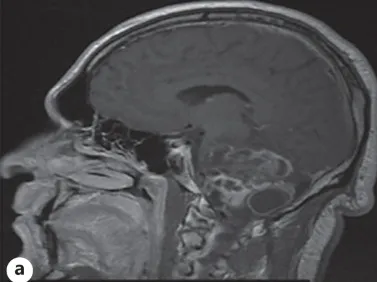

**Image Labels:**

['radiology', 't1', 'head', 'sagittal', 'mri', 'mass', 'contrast', 'spin_echo', 'head', 'radiology', 'sagittal', 'mri']

**Image Caption:**

Mixed cystic-solid pattern of PXA. MR images show multiple cystic lesions and solid masses located in the right cerebellar hemisphere. A; Sagittal view T1-weighted with contrast.

**Citation Information:**

{'pmcid': 'PMC10018421',
 'doi': '10.1159/000529741',
 'pmid': '36938309',
 'title': 'A Recurrent Pleomorphic Xanthoastrocytoma in the Cerebellum in a Young Adult: A Case Report and Review of the Literature',
 'year': '2023',
 'authors': ['Ruba Aljendi',
  'Mohammed Amr Knifaty',
  'Mohammed Amin',
  'Souliman Diab',
  'Muhammad Saleh Ali',
  'Zuheir Alshehabi'],
 'journal': 'Case Rep Neurol',
 'journal_detail': '2023 Feb 17;15(1):54-62.',
 'link': 'https://pubmed.ncbi.nlm.nih.gov/36938309/',
 'license': 'CC BY-NC'}

In [23]:
mdc.display_example()

And that's it! Enjoy your customized datasets! 🙂